In [133]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install imbalanced-learn

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Leer datos
df = pd.read_csv("NHANES2009-2012_clean.csv")
df

,SurveyYr,ID,Gender,Age,Race1,Education,MaritalStatus,HHIncomeMid,Poverty,HomeRooms,...,Marijuana,AgeFirstMarij,RegularMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation
0,2009_10,55829,female,28,White,CollegeGrad,Married,100000.0,5.00,5.0,...,Yes,15.0,No,Yes,Yes,13.0,20.0,1.0,No,Heterosexual
1,2009_10,57112,male,14,White,NaN,NaN,87500.0,4.17,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009_10,60232,male,80,White,8thGrade,Married,22500.0,1.58,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009_10,59919,male,22,White,HighSchool,NeverMarried,50000.0,1.85,7.0,...,Yes,10.0,Yes,Yes,Yes,18.0,3.0,1.0,No,Heterosexual
4,2009_10,56351,male,1,White,NaN,NaN,30000.0,1.45,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7827,2011_12,68101,male,80,White,CollegeGrad,Married,17500.0,1.16,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7828,2011_12,67366,female,5,White,NaN,NaN,22500.0,0.89,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7829,2011_12,64065,male,46,White,SomeCollege,Married,100000.0,5.00,4.0,...,No,NaN,No,No,Yes,17.0,7.0,1.0,No,Heterosexual
7830,2011_12,66189,male,47,Mexican,9_11thGrade,Married,50000.0,2.70,8.0,...,Yes,15.0,Yes,No,Yes,18.0,7.0,1.0,No,Heterosexual


### Generación Vista Minable

In [75]:
#  1. Selección  de registros que presenten en su tototalidad las variables:
# Diabetes,Gender,Age,BMI,PhysActiveDays,HHIncomeMid,SleepHrsNight,AlcoholYear,SmokeNow

selected_vars = ['Diabetes', 'Gender', 'Age', 'BMI', 'PhysActiveDays', 'HHIncomeMid', 'SleepHrsNight', 'AlcoholYear', 'SmokeNow']
df_selected = df[selected_vars].dropna()

df_selected

,Diabetes,Gender,Age,BMI,PhysActiveDays,HHIncomeMid,SleepHrsNight,AlcoholYear,SmokeNow
3,No,male,22,22.74,3.0,50000.0,7.0,156.0,No
5,No,female,39,27.46,4.0,17500.0,9.0,2.0,Yes
32,No,male,70,22.72,6.0,70000.0,7.0,104.0,No
43,No,male,64,31.64,3.0,100000.0,7.0,156.0,No
81,No,male,30,28.44,3.0,22500.0,8.0,52.0,Yes
...,...,...,...,...,...,...,...,...,...
7809,No,female,65,40.60,5.0,30000.0,7.0,60.0,No
7813,No,male,74,26.00,2.0,30000.0,8.0,364.0,No
7814,No,male,59,24.80,6.0,100000.0,8.0,104.0,Yes
7819,Yes,male,77,35.50,4.0,50000.0,5.0,3.0,No


In [76]:
#  2. Generación de nueva variable BMI_AgeRatio
df_selected['BMI_AgeRatio'] = df_selected['BMI'] / df_selected['Age']

df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 3 to 7820
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diabetes        1082 non-null   object 
 1   Gender          1082 non-null   object 
 2   Age             1082 non-null   int64  
 3   BMI             1082 non-null   float64
 4   PhysActiveDays  1082 non-null   float64
 5   HHIncomeMid     1082 non-null   float64
 6   SleepHrsNight   1082 non-null   float64
 7   AlcoholYear     1082 non-null   float64
 8   SmokeNow        1082 non-null   object 
 9   BMI_AgeRatio    1082 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 93.0+ KB


In [77]:
# 3. Normalización z-score de las variables numéricas
numeric_vars = ['Age', 'BMI', 'HHIncomeMid', 'SleepHrsNight', 'PhysActiveDays', 'BMI_AgeRatio']

# Almacenar media y desviación estándar para después volver a medidas reales
means = df_selected[numeric_vars].mean()
stds = df_selected[numeric_vars].std()

# Normalizar
df_selected[numeric_vars] = (df_selected[numeric_vars] - means) / stds
df_selected.describe()

,Age,BMI,PhysActiveDays,HHIncomeMid,SleepHrsNight,AlcoholYear,BMI_AgeRatio
count,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1.082000e+03,1082.000000,1.082000e+03
mean,-1.576065e-16,-3.283469e-16,6.566938e-18,-4.925204e-17,2.331263e-16,94.124769,4.596857e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,114.045790,1.000000e+00
min,-1.722514e+00,-2.195112e+00,-1.441245e+00,-1.686099e+00,-3.531700e+00,0.000000,-1.508453e+00
25%,-8.767231e-01,-7.314884e-01,-8.946528e-01,-8.102282e-01,-5.734655e-01,3.000000,-7.611736e-01
50%,-3.093266e-02,-1.655539e-01,-3.480608e-01,-1.732314e-01,1.660931e-01,52.000000,-2.071377e-01
75%,7.544442e-01,5.751851e-01,7.451230e-01,1.021138e+00,9.056516e-01,156.000000,5.379978e-01
max,1.902303e+00,5.125913e+00,1.838307e+00,1.419261e+00,3.863886e+00,364.000000,5.220252e+00


In [78]:
# 4. Discretización de la variable AlcoholYear en 3 categorías
df_selected['AlcoholYear_cat'] = pd.cut(df_selected['AlcoholYear'], bins=3, labels=['bajo', 'medio', 'alto'])

df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 3 to 7820
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Diabetes         1082 non-null   object  
 1   Gender           1082 non-null   object  
 2   Age              1082 non-null   float64 
 3   BMI              1082 non-null   float64 
 4   PhysActiveDays   1082 non-null   float64 
 5   HHIncomeMid      1082 non-null   float64 
 6   SleepHrsNight    1082 non-null   float64 
 7   AlcoholYear      1082 non-null   float64 
 8   SmokeNow         1082 non-null   object  
 9   BMI_AgeRatio     1082 non-null   float64 
 10  AlcoholYear_cat  1082 non-null   category
dtypes: category(1), float64(7), object(3)
memory usage: 94.2+ KB


In [79]:
# 5. Dummificación de variables categóricas
dummies = pd.get_dummies(df_selected[['Gender', 'AlcoholYear_cat', 'SmokeNow']], drop_first=False)
df_selected = pd.concat([df_selected, dummies], axis=1)

df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 3 to 7820
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Diabetes               1082 non-null   object  
 1   Gender                 1082 non-null   object  
 2   Age                    1082 non-null   float64 
 3   BMI                    1082 non-null   float64 
 4   PhysActiveDays         1082 non-null   float64 
 5   HHIncomeMid            1082 non-null   float64 
 6   SleepHrsNight          1082 non-null   float64 
 7   AlcoholYear            1082 non-null   float64 
 8   SmokeNow               1082 non-null   object  
 9   BMI_AgeRatio           1082 non-null   float64 
 10  AlcoholYear_cat        1082 non-null   category
 11  Gender_female          1082 non-null   bool    
 12  Gender_male            1082 non-null   bool    
 13  AlcoholYear_cat_bajo   1082 non-null   bool    
 14  AlcoholYear_cat_medio  1082 non-null   bool  

In [80]:
# Guardar el DataFrame final
df_selected.to_csv('Outputs/vista_minable_diabetes.csv', index=False)

### Análisis y Visualización de los Datos

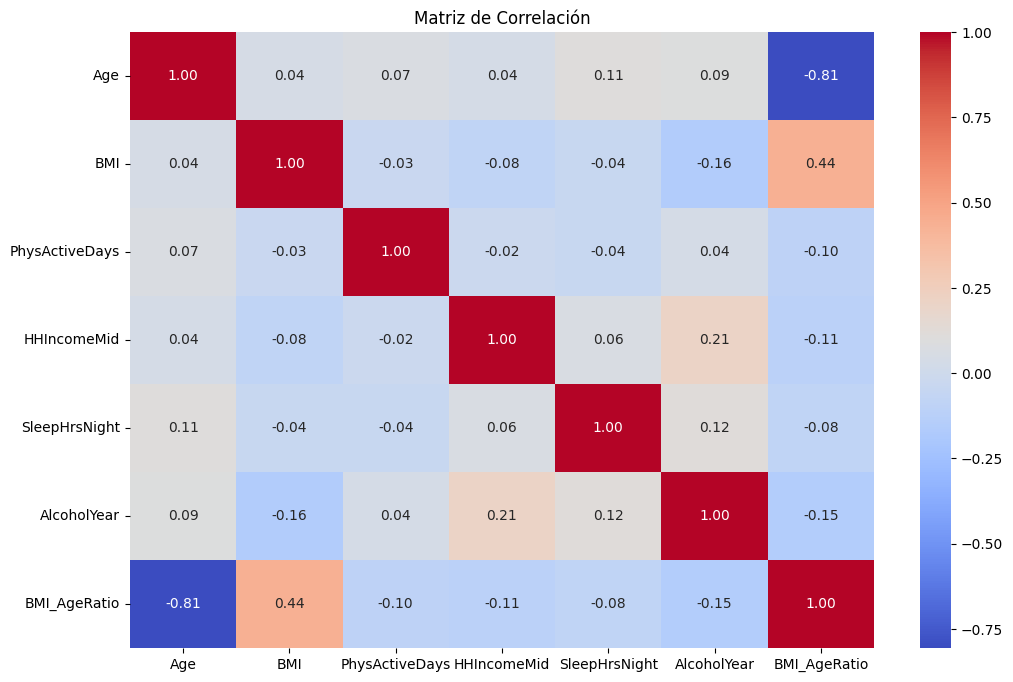

In [81]:
# Obtener gráfica de correlación de variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_selected.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

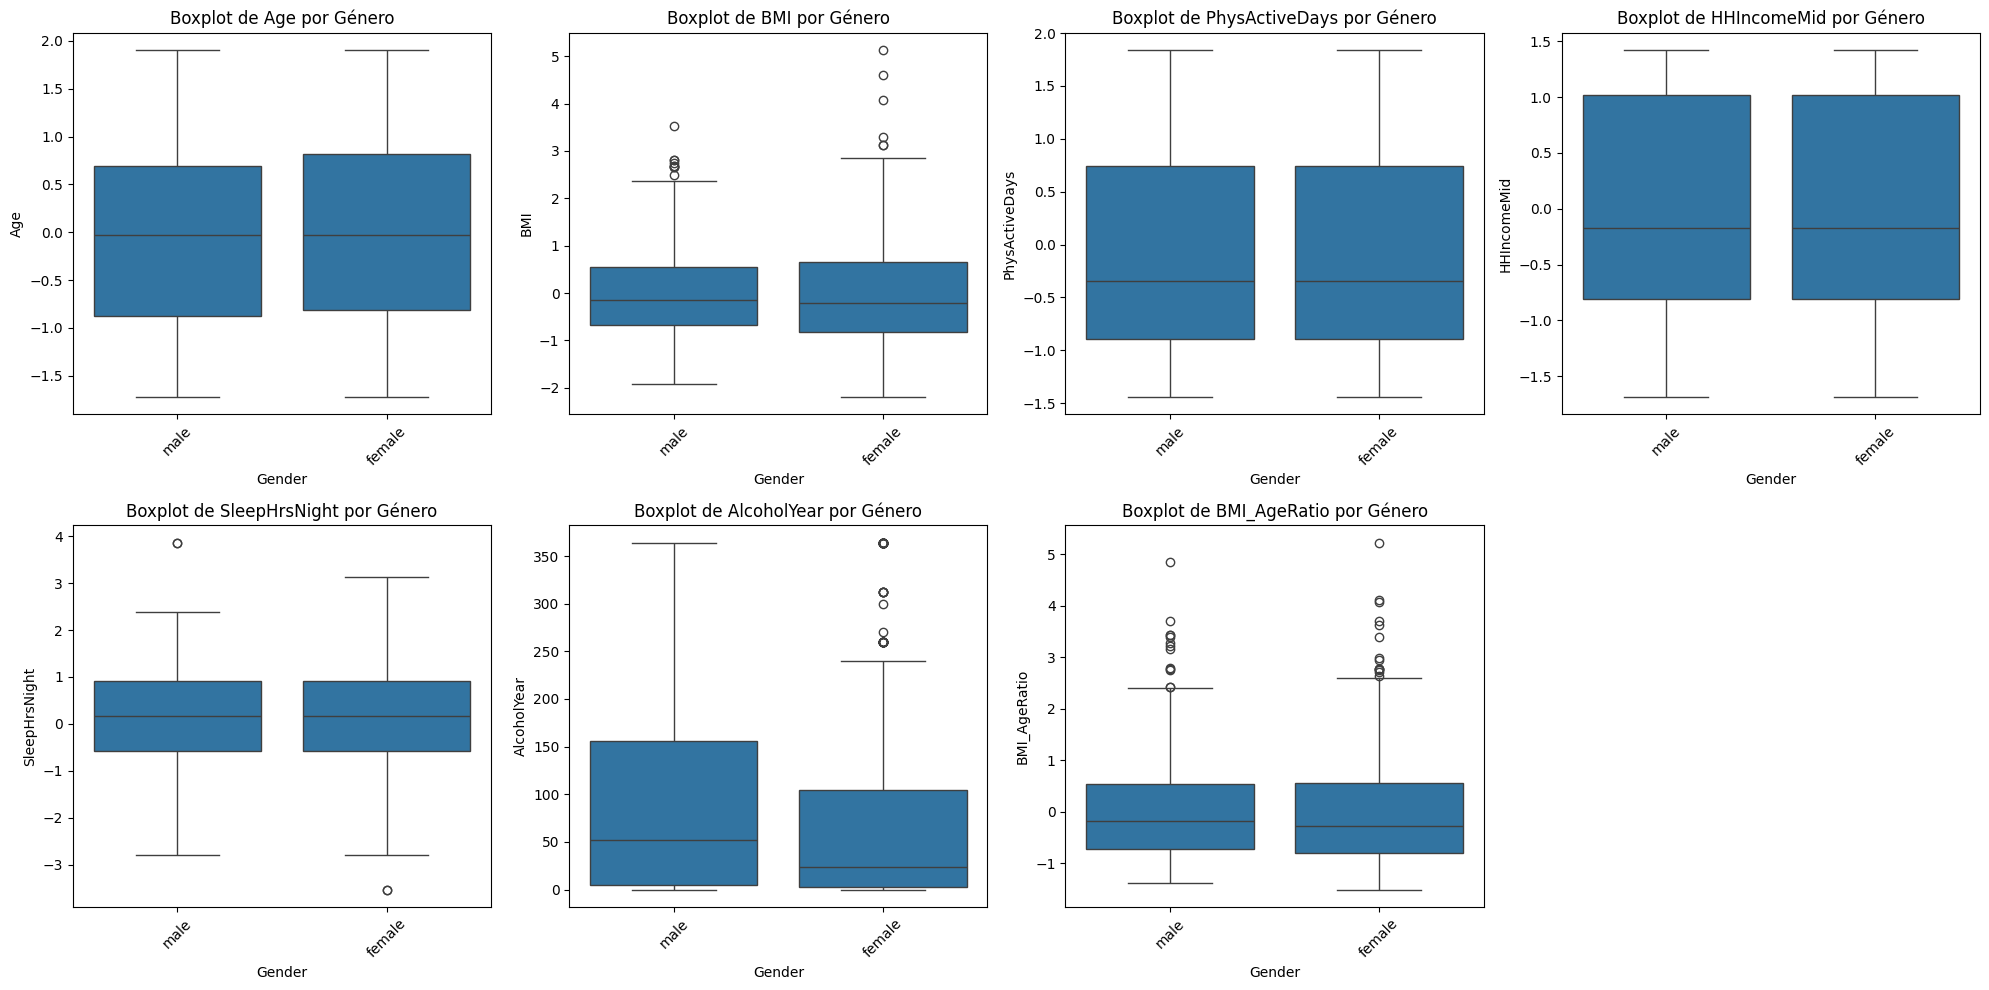

In [95]:
# Para cada una de las variables númericas hacer un subplot que se el boxplot de la variable comparado por genero
numeric_vars = df_selected.select_dtypes(include=['float64', 'int64']).columns

# Cantidad de variables
n_vars = len(numeric_vars)
n_cols = 4  

# Determinar tamaño de grid según número de columnas
rows = (n_vars + n_cols - 1) // n_cols  # redondeo hacia arriba
fig, axes = plt.subplots(nrows=rows, ncols=n_cols, figsize=(n_cols * 5, rows * 5))
axes = axes.flatten()

# Crear boxplots
for i, var in enumerate(numeric_vars):
    sns.boxplot(data=df_selected, x='Gender', y=var, ax=axes[i])
    axes[i].set_title(f"Boxplot de {var} por Género")
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

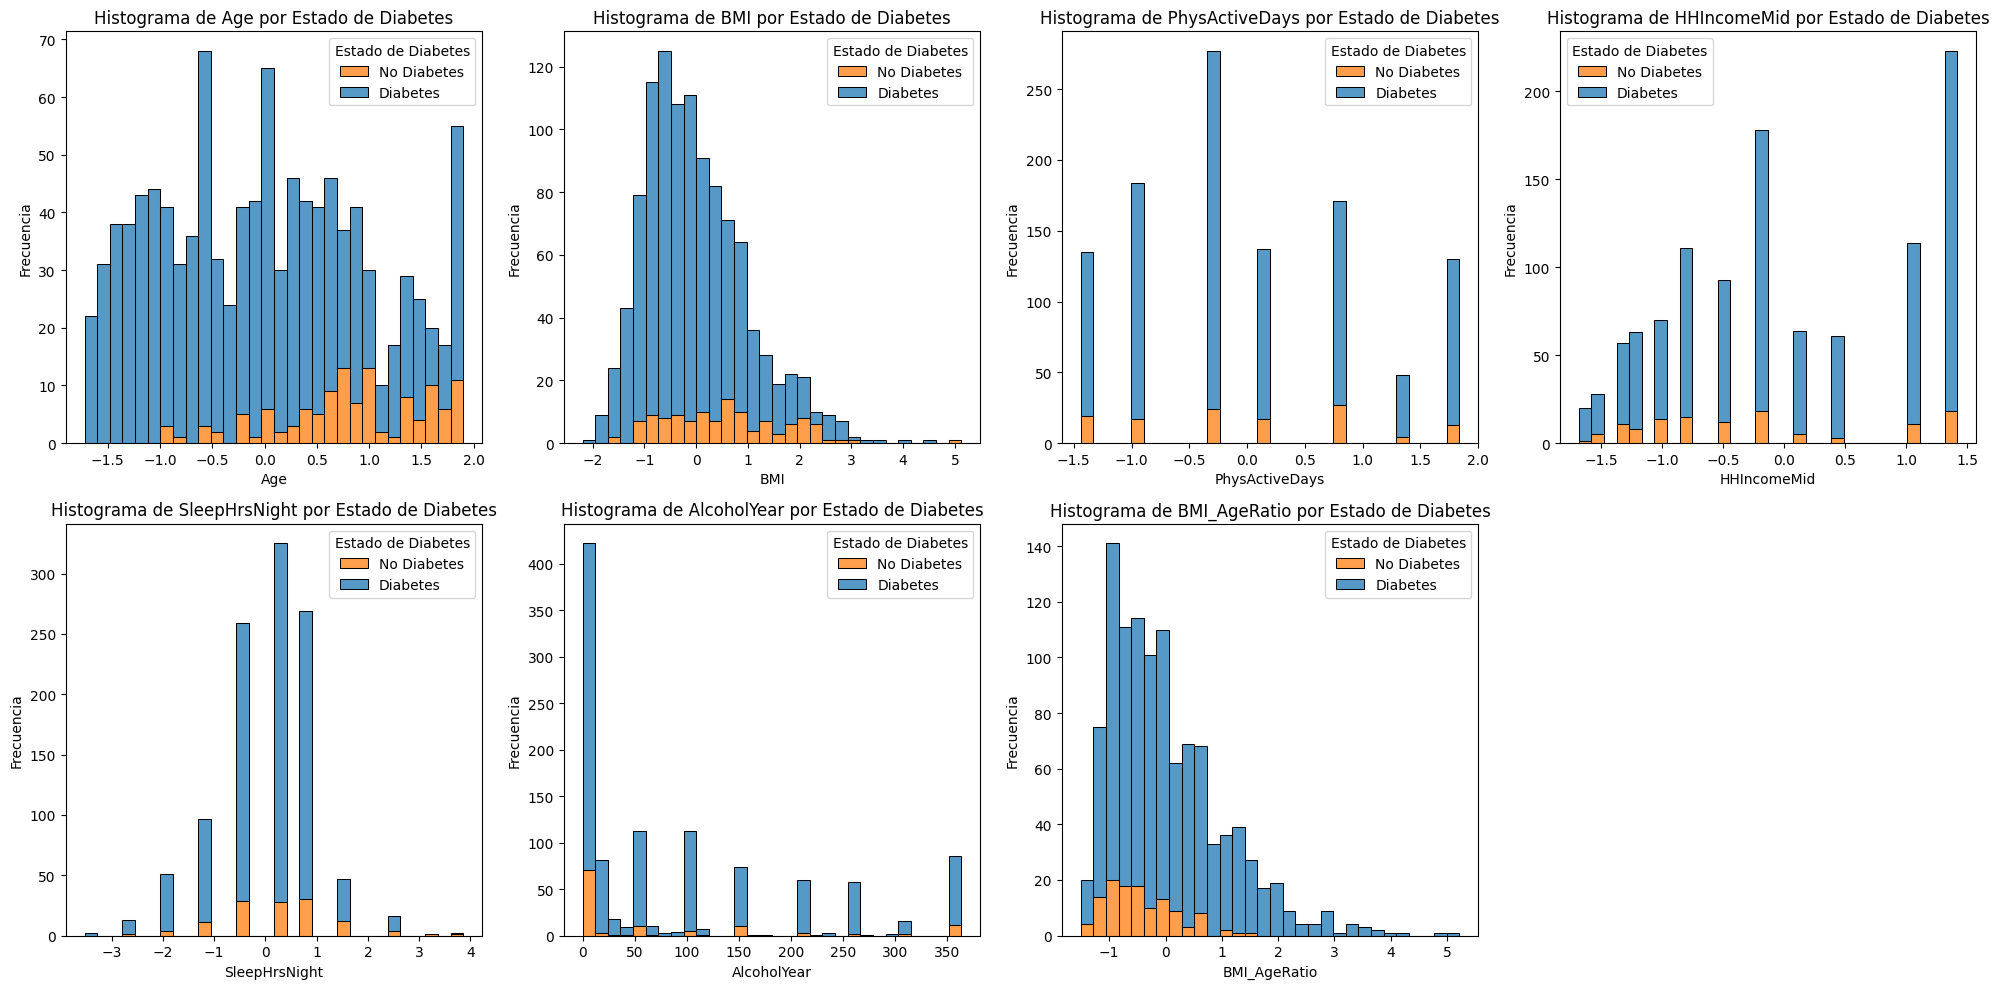

In [106]:
# Histograma de variables numéricas por estado de diabetes
numeric_vars = df_selected.select_dtypes(include=['float64', 'int64']).columns

# Cantidad de variables
n_vars = len(numeric_vars)
n_cols = 4  

# Determinar tamaño de grid según número de columnas
rows = (n_vars + n_cols - 1) // n_cols  # redondeo hacia arriba
fig, axes = plt.subplots(nrows=rows, ncols=n_cols, figsize=(n_cols * 5, rows * 5))
axes = axes.flatten()

# Crear histogramas
for i, var in enumerate(numeric_vars):
    sns.histplot(data=df_selected, x=var, hue='Diabetes', multiple='stack', bins=30, ax=axes[i])
    axes[i].set_title(f"Histograma de {var} por Estado de Diabetes")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frecuencia")
    axes[i].legend(title="Estado de Diabetes", labels=["No Diabetes", "Diabetes"])

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

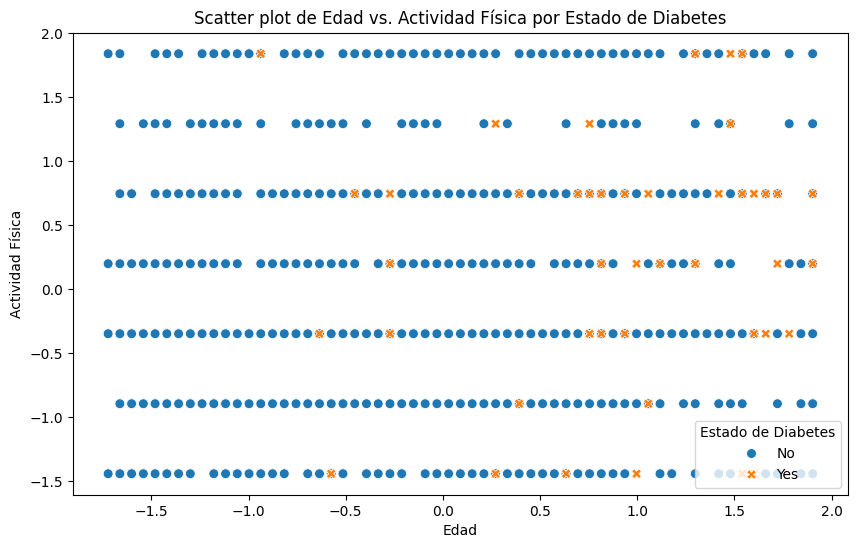

In [116]:
# Scatter plot de Edad vs. Días de Actividad Física segmentado por diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Age', y='PhysActiveDays', hue='Diabetes', style='Diabetes', s=50)
plt.title("Scatter plot de Edad vs. Actividad Física por Estado de Diabetes")
plt.xlabel("Edad")
plt.ylabel("Actividad Física")
plt.legend(title="Estado de Diabetes")
plt.show()


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

# Entrenamiento de modelo sencillo de regresión logística para clasificar diabetes
X = df_selected.drop(columns=['Diabetes', 'Gender', 'PhysActiveDays', 'AlcoholYear_cat', 'SmokeNow'])
y = df_selected['Diabetes']

# División de conjuntos Train 70% y Test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Hacer oversampling de los registros con diabetes para balancear clases
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Entrenar modelo de regresión logística
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Obtener predicciones
y_pred_lr = model_lr.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


[[101  48]
 [ 31 109]]
              precision    recall  f1-score   support

          No       0.77      0.68      0.72       149
         Yes       0.69      0.78      0.73       140

    accuracy                           0.73       289
   macro avg       0.73      0.73      0.73       289
weighted avg       0.73      0.73      0.73       289

